# Boston Housing Dataset
Using the cannonical Boston Housing dataset, we'll consider these research questions:
- How much variation in **median house price** in each census tract can be explained by the characteristics present in the dataset? This is a question of measure of fit of a model, and is assessed using the **R Squared** value
- What are the strength and magnitude of association between each characteristic (independent variable) and the median housing price (dependent variable)? This question is assessed by the magnitude of the beta values output by the model, and the uncertainty around that estimate (captured in the Standard Error around that estimate, and the corresponding p value).

In [1]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt

In [10]:
# Load and format data, then print the description
boston = load_boston()
bos_df = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_df["med_price"] = pd.Series(boston.target * 1000)
print(boston.DESCR)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(boston.target, columns=["MEDV"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Before you get started, you should make sure you understand the dataset by answering the following questions:
- What is your **unit of analysis**? In other words, what does each row represent?
> Each row represents the boston house data set, and includes various attributes that determine the price of the houses.
- What is your outcome of interest?
> Hedonic prices and the demand for clean air
- What will performing a linear regression allow you to do?
> To better understand the relationship of the house prices and the various attributes (predictors) in the dataset.

## Preliminary analysis (before modeling)

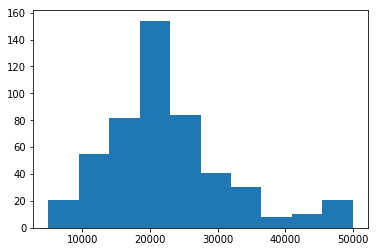

In [4]:
# Draw a historgram of your outcome of interest
# Make sure to include a descriptive chart title (i.e., what is it actually a distribution of?)
prices = bos_df.iloc[:,13]
prices
plt.hist(prices, label = "Distribution of Prices of houses")
plt.show()

In [35]:
# Compute the correlation between your outcome of interest and each other variable
# Hint: you can use the `.corr()` method of your dataframe to compute all correlations, 
# then select and sort the values you are interested in
bos_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,med_price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


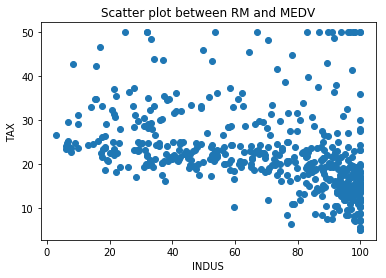

In [18]:
# Draw a scatter plot between your most correlated feature and your outcome of interest
# Make sure to include a descriptive plot title
y = target["MEDV"]
plt.scatter(bos_df.iloc[:,6], y)
plt.title("Scatter plot between RM and MEDV")
plt.xlabel("INDUS")
plt.ylabel("TAX")
plt.show()

## Univariate Regression
Perform a univariate regression of your most correlated variable to your outcome of interest. Note, this allows you to assess a hypothesis regarding the relationship between these variables.

> **Answer**: There is a relationship between the attributes RM and MEDV

In [21]:
# Fit your model to your data
#lm = smf.glm(formula='INDUS ~ TAX', data=bos_df)
X = bos_df["RM"]
y = target["MEDV"]
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          3.74e-256
Time:                        19:32:54   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# How much variation in your outcome is explained by variation in you independent variable?
# Hint: the value is stored as part of your model fit
print(str(model.rsquared) + "% of the variation in the outcome can be explained by variation in the independent variable")

0.9013578661721013% of the variation in the outcome can be explained by variation in the independent variable


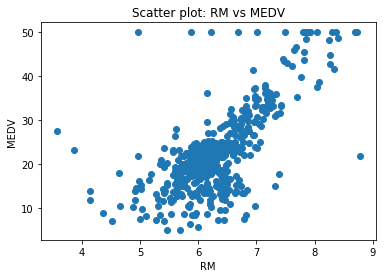

In [24]:
# Create a scatter plot of your independent variable versus your dependent variable
# Overlay on the scatter plot the predictions from your model
# Make sure to include descriptive lables/titles
plt.scatter(X, y)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Scatter plot: RM vs MEDV")

plt.show()

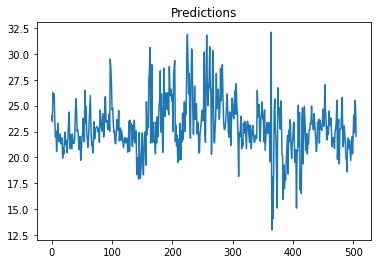

In [26]:
plt.plot(predictions)
plt.title("Predictions")
plt.show()

Based on your model, can you reject your null hypothesis? If so, what do you believe the relationship to be between your independnet and dependent variables? Make sure to include specific values in your response.

> **Answer**: Based on the model above, we can say that the null-hypothesis cannot be rejected because the variance is high and thus the model displays a significant relationship between the independent and dependent variable.

## Multivariate regression
Perform a multivariate regression of all of your features to your outcome of interest. Note, this allows you to assess a hypothesis regarding the relationship between each feature and your outcome.

In [32]:
# Fit a model with all features
# Hint: you can "join" together boston.feature_names
all_data = boston.feature_names
new_X = bos_df[all_data]
new_model = smf.OLS(y, new_X).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Sun, 17 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:40:10   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

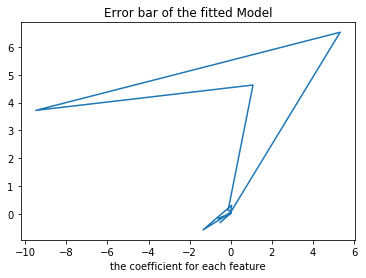

In [52]:
# Create a plot that shows:
# - X axis: the coefficient for each feature in your model, 
#   AND the confidence intervals around it
# - Y axis: the name of each feature
# Hint: you can extract this information using MODEL_NAME.conf_int() and MODEL_NAME.params
# Hint: matplotlib has an `.errorbar()` chart type for this
# Include a descriptive chart title
values = new_model.fittedvalues
conf_int = new_model.conf_int()
plt.errorbar(conf_int[0],conf_int[1])
#conf_int[0]
plt.title("Error bar of the fitted Model")
plt.xlabel("the coefficient for each feature")
plt.show()

How much variation in your outcome can you explain using all of these variables?

> **Answer**: We can explain about 95.9% percent of the variation using all the predictors we have used in the previous model.

Note the coefficient (beta value) on LSTAT -- how (and why) is it different than above?

> **Answer**: 
The beta values in regression are the estimated coeficients of the explanatory variables indicating a change on response variable caused by a unit change of respective explanatory variable keeping all the other explanatory variables constant/unchanged. Whereas correlations coefficient is the overall estimated value of correlation measuring the strength and the direction of the relationships between the response and covariates.

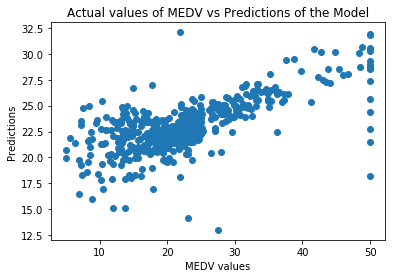

In [55]:
# Create a scatter plot of your actual data (x-axis) versus your predictions 
# Add a 45 degree line to the plot
# Bonus (not for credit): Shade the areas of under/over prediction
plt.scatter(y, predictions)
plt.title("Actual values of MEDV vs Predictions of the Model")
plt.xlabel("MEDV values")
plt.ylabel("Predictions")
plt.show()